<a href="https://colab.research.google.com/github/polaabhiram/ML/blob/main/ML_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.head()
df['const']=1
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,const
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#constant features

const=[]

for feature in df.columns:
  if(df[feature].std()==0):
    const.append(feature)

print(const)

['const']


In [ ]:
#quasi

quasi=[]

for feature in df.columns:
  pre=(df[feature].value_counts()/len(df)).sort_values(ascending=False).values[0]
  if(pre>=0.99):
    quasi.append(feature)

print(quasi)


['const']


In [ ]:
#duplicated features

df['const2']=df['const']
duplicates=[]
for col in range (len(df.columns)):
  for col2 in range(col):
    if(df[col].equals(df[col2])):
      duplicates.append(col2)

print(duplicates)


KeyError: 1

In [1]:
#basic example ( without dataset )
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = np.array([1,2,3,4,5]).reshape(-1,1) #independent var
Y = np.array([50,55,65,70,75]) #dependent var
model = LinearRegression()
model.fit(X,Y)

Y_pred = model.predict(X) #prediction for original data

#new data point:
new_data = np.array([6]).reshape(-1,1)
new_data_pred = model.predict(new_data)
#evalutation metrics:
mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y, Y_pred)

#Adjusted rsquare calc:
n = len(Y)
k = 1
adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))

#print evaluation metrics:
print("Mean absolute error: ", mae)
print("Mean square error: ", mse)
print("Root mean square error: ", rmse)
print("R2 score: ", r2)
print("Adjusted R2 score: ", adjusted_r2)

#original data prediction
for i in range(len(X)):
  print(f"Hours Studied: {X[i][0]}, Actual Score: {Y[i]}, Predicted Score: {Y_pred[i]:.2f}")
#new data prediciton:
print(f"new prediction: {new_data_pred[0]:.2f}")

Mean absolute error:  1.0
Mean square error:  1.5
Root mean square error:  1.224744871391589
R2 score:  0.9825581395348837
Adjusted R2 score:  0.9767441860465116
Hours Studied: 1, Actual Score: 50, Predicted Score: 50.00
Hours Studied: 2, Actual Score: 55, Predicted Score: 56.50
Hours Studied: 3, Actual Score: 65, Predicted Score: 63.00
Hours Studied: 4, Actual Score: 70, Predicted Score: 69.50
Hours Studied: 5, Actual Score: 75, Predicted Score: 76.00
new prediction: 82.50


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [11]:
from google.colab import drive



df = pd.read_csv("/content/drive/MyDrive/house_price_train (1).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
data = df[['YearBuilt','SalePrice']].dropna()
data

,YearBuilt,SalePrice
0,2003,208500
1,1976,181500
2,2001,223500
3,1915,140000
4,2000,250000
...,...,...
1455,1999,175000
1456,1978,210000
1457,1941,266500
1458,1950,142125


Slope: 1300.9310044469596
Intercept: -2382648.9153812435
R-square: 0.28975191793500943
MAE: 51148.46731516804
RMSE: 5447834477.467489


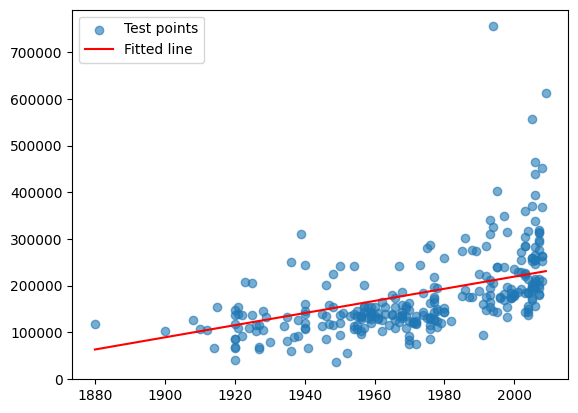

In [17]:
import matplotlib.pyplot as plt
import numpy as np
X = data[['YearBuilt']].values
y = data['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Slope:", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("R-square:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
# print("coeff: ", lr.coef_)
plt.scatter(X_test, y_test, alpha=0.6, label="Test points")
x_line = np.linspace(X_test.min(), X_test.max(), 200).reshape(-1,1)
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, 'r', label="Fitted line")
plt.legend()

Intercept: -697484.1237392655
       Feature   Coefficient
0    YearBuilt    316.327781
1      LotArea      1.389385
2  OverallQual  39304.002505
Mean Squared Error: 2454670991.3415294
R^2 Score: 0.6799782792755942


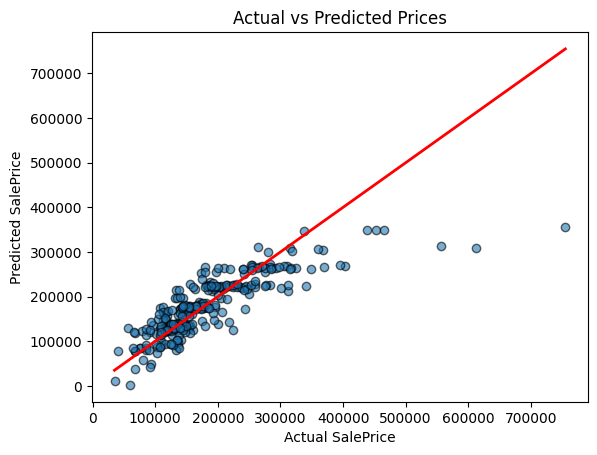

In [19]:
## MULTILINEAR REGRESSION
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#loading
df = pd.read_csv("/content/drive/MyDrive/house_price_train (1).csv")

#another way of writing is
# data = df[['YearBuilt', 'LotArea', 'OverallQual'] + ['SalePrice']].dropna()

data = df[['YearBuilt', 'LotArea', 'OverallQual','SalePrice']].dropna()
data
X = data[['YearBuilt', 'LotArea', 'OverallQual']]
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
lr = LinearRegression()
lr.fit(X_train, y_train)

#coefficients
print("Intercept:", lr.intercept_)
coef_df = pd.DataFrame({"Feature": ['YearBuilt', 'LotArea', 'OverallQual'], "Coefficient": lr.coef_})
print(coef_df)

# predictions
y_pred = lr.predict(X_test)

# evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

#displaying in the form of graph

plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)
plt.show()



Intercept: [-75.79463893]
       Feature  Coefficient
0    YearBuilt     0.032248
1      LotArea     0.000207
2  OverallQual     1.697442

Confusion Matrix:
 [[148  13]
 [ 17 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       161
           1       0.90      0.87      0.88       131

    accuracy                           0.90       292
   macro avg       0.90      0.89      0.90       292
weighted avg       0.90      0.90      0.90       292

Accuracy Score: 0.8972602739726028


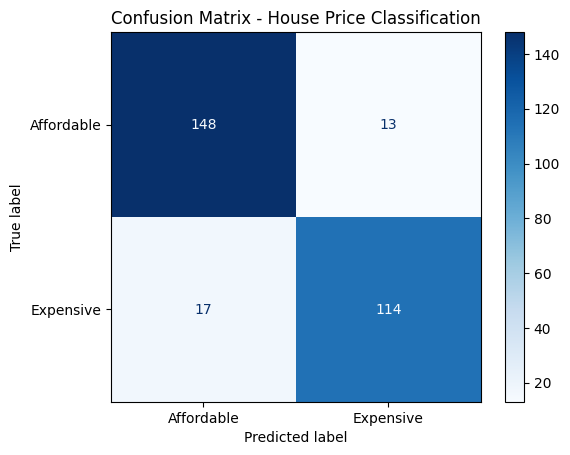

In [20]:
#Logistic Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv("/content/drive/MyDrive/house_price_train (1).csv")

# handling missing values
#here we are filling numeric features with median
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col] = df[col].fillna(df[col].median())
#and here we are filling categorical features with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

#Creating classification target
#here we are classifying houses as expensive if SalePrice > median otherwise they are affordable
median_price = df["SalePrice"].median()
df["Expensive"] = (df["SalePrice"] > median_price).astype(int)

#Selecting features
features = ["YearBuilt", "LotArea", "OverallQual"]
X = df[features]
y = df["Expensive"]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#logistic model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Predictions
y_pred = log_reg.predict(X_test)

#Model coefficients
print("Intercept:", log_reg.intercept_)
coef_df = pd.DataFrame({"Feature": features, "Coefficient": log_reg.coef_[0]})
print(coef_df)

#Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

#Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Affordable", "Expensive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - House Price Classification")
plt.show()


PCA


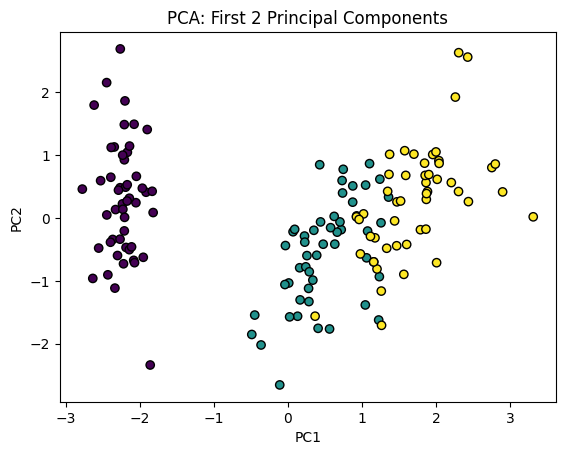

Loadings (variable importance):
                         PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942

Variance explained by PC1 and PC2: [0.72962445 0.22850762]
Combined variance explained: 0.9581320720000166


In [21]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#loading the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# (a) Standardize the data
# we standardize the data because different features have different units and ranges.
# for example, petal length (cm) vs sepal width (mm)
# if we dont scale, the feature with bigger numbers will unfairly dominate the result.

X_scaled = StandardScaler().fit_transform(X)

# (b) Apply PCA (reduce to 2 components just for easy plotting)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot (PC1 vs PC2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First 2 Principal Components")
plt.show()

# (c) Most important variables for PC1 and PC2
#PCA loadings tell us which original features (sepal length, petal width, etc.) are most important for forming PC1 and PC2.
#The bigger the number (positive or negative), the more that feature matters.

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=X.columns
)
print("Loadings (variable importance):\n", loadings)

# (d) Variance explained by PC1 and PC2
#PCA tells us what % of the total data variation is captured by each PC.
#Higher % means that PC keeps more of the original information.
print("\nVariance explained by PC1 and PC2:", pca.explained_variance_ratio_)

# (e) Total variance explained by both PCs
print("Combined variance explained:", pca.explained_variance_ratio_.sum())


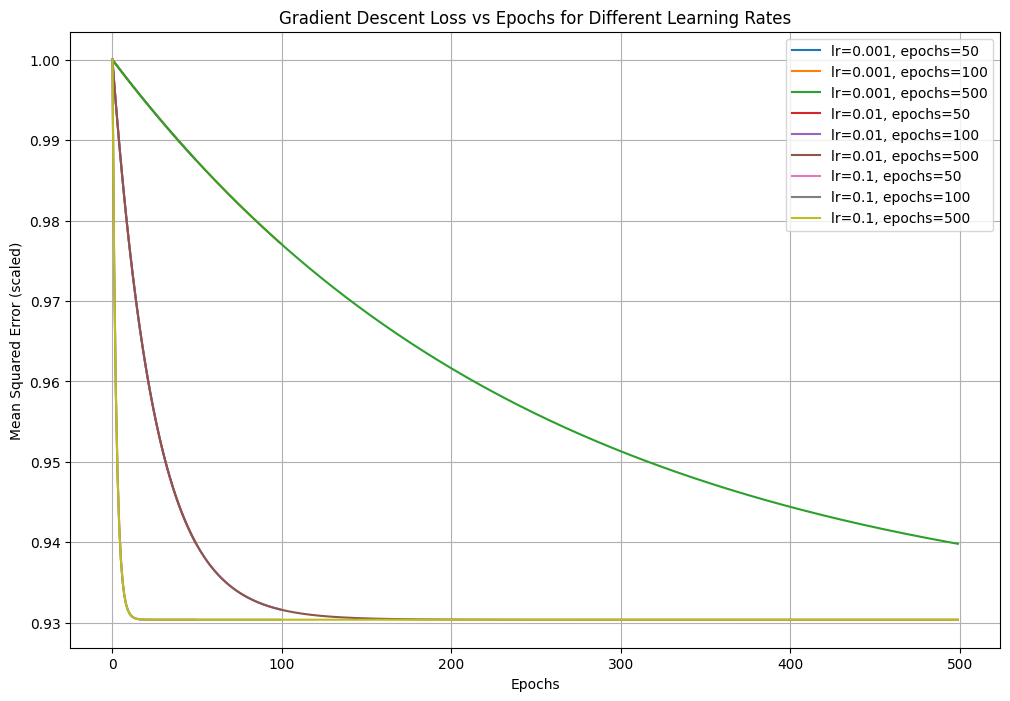

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Load your dataset

# Replace this with your actual file path
data = pd.read_csv("/content/drive/MyDrive/house_price_train (1).csv")

# 2. Select feature(s) and target

# Example: assuming 'Size' is feature and 'Price' is target
X = data[['LotArea']].values  # use multiple columns if multivariate
y = data[['SalePrice']].values

# 3. Feature Scaling (important for gradient descent)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


# 4. Add bias term (intercept)

m = X_scaled.shape[0]
X_b = np.c_[np.ones((m, 1)), X_scaled]  # Add bias term (column of ones)

# 5. Gradient Descent Function
def gradient_descent(X, y, lr=0.01, epochs=100):
    theta = np.zeros((X.shape[1], 1))  # Initialize weights
    loss_history = []

    for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (2 / m) * X.T.dot(errors)
        theta -= lr * gradients
        loss = np.mean(errors ** 2)
        loss_history.append(loss)

    return theta, loss_history

# 6. Try different learning rates and epochs

learning_rates = [0.001, 0.01, 0.1]
epochs_list = [50, 100, 500]

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    for epochs in epochs_list:
        theta, loss_history = gradient_descent(X_b, y_scaled, lr=lr, epochs=epochs)
        label = f"lr={lr}, epochs={epochs}"
        plt.plot(range(epochs), loss_history, label=label)

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (scaled)')
plt.title('Gradient Descent Loss vs Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'ridgeregression'

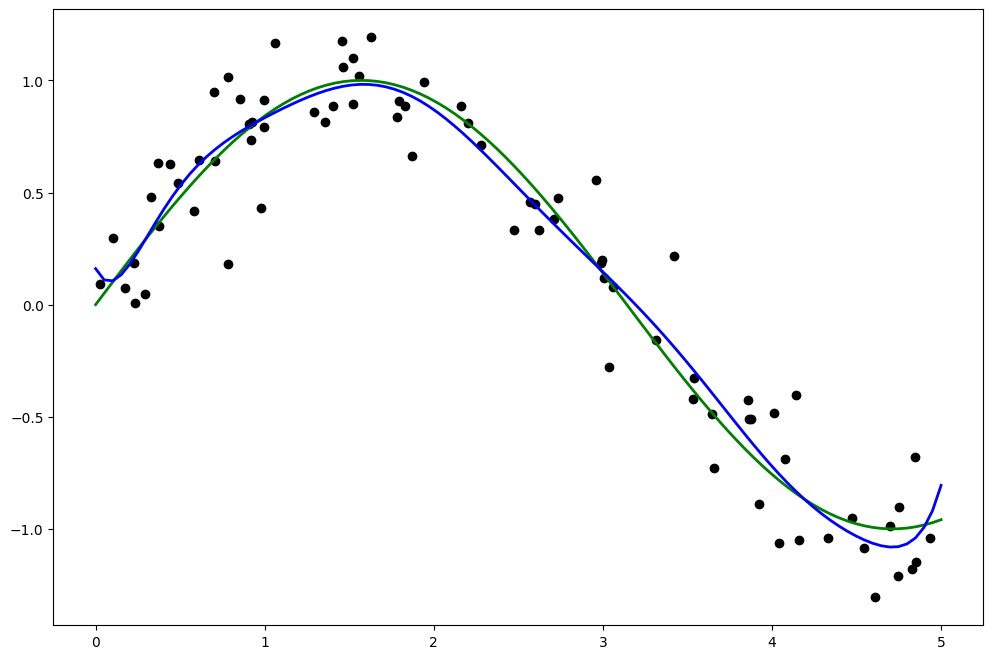

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_true = np.sin(X_test).ravel()

degree = 10
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=10000)
}

results = {}

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='black', label="Training data")
plt.plot(X_test, y_true, color='green', label='True function (sin)', linewidth=2)

colors = ['blue', 'red', 'orange']

for (name, model), color in zip(models.items(), colors):
    pipeline = make_pipeline(PolynomialFeatures(degree), model)
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X)
    mse = mean_squared_error(y, y_train_pred)
    coefs = pipeline.named_steps[name.lower().replace(" ", "")].coef_
    results[name] = {
        "MSE": mse,
        "Coefficients": coefs
    }
    plt.plot(X_test, y_pred, label=f'{name} (MSE={mse:.3f})', color=color, linewidth=2)

plt.title("LASSO and Ridge Regularization on Nonlinear Data")
plt.legend()
plt.grid(True)
plt.show()

for name, result in results.items():
    print(f"\n{name}")
    print(f"Mean Squared Error: {result['MSE']:.4f}")
    print("Coefficients:")
    print(result["Coefficients"])


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 2. Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 4. Plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=diabetes.feature_names, filled=True, rounded=True)
plt.title("Decision Tree for Diabetes Dataset")
plt.show()
